In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt


import matplotlib.cm as cm
from matplotlib.colors import Normalize



from scipy.spatial.distance import pdist
clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/projects/")
sys.path.append("")
import graph_transitions as gt

# List of directed graphs with degree 2 and 9 vertices 

In [2]:
poke_pos = [  [265,456],
         [184,475],[347,475],
    [116,518],[265,518],[414,518],
         [184,561],[347,561],
              [265,580]]

In [3]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [4]:
edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])
edges.extend([[0,8],[8,0]])

In [5]:
rew_nodes = [0,3,5,8]

In [6]:
layouts = gt.optimize.get_all_valid_physical_layouts(rew_nodes,9)

In [7]:
edge_set = gt.optimize.get_transition_set(edges)

In [8]:
fav_layouts = [158,565,734,1037,740]


In [9]:
def flip(layout,axis='V'):
    if axis=='V':
        #defines new position of nodes after flip, 
        #node 0 should go to pos 8; node 1 to pos 6 etc
        flip = [8,6,7,3,4,5,1,2,0]
    elif axis=='H':
        flip = [0,2,1,5,4,3,7,6,8]
    else:
        raise ValueError('can only flip vertically ("V")or horizontally ("H")')
        
    layout2 = [flip[i] for i in layout]
    return layout2


def rotate(layout,direction='cw'):
    if direction=='cw':
        #defines new position of nodes after rotation, 
        #node 0 should go to pos 5; node 1 to pos 2 etc
        rot = [5,2,7,0,4,8,1,6,3]  
    elif direction=='ccw':
        rot = [3,6,1,8,4,0,7,2,5]
    else:
        raise ValueError('Can only rotate the graph clockwise ("cw") or counterclockwise ("ccw")')
    
    layout2 = [rot[i] for i in layout]
    return layout2

# Draw favourite loops 

In [31]:
fav_layouts = [158,565,734,1037,740]


edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])
edges.extend([[0,8],[8,0]])

G = nx.DiGraph()
G.add_edges_from(edges)

In [39]:
np.array(((layouts[fav_layouts[4]])))

array([3, 1, 6, 0, 4, 5, 7, 2, 8])

In [ ]:
#G1 array([0, 6, 1, 3, 4, 8, 2, 7, 5]) , array([0, 4, 7, 5, 2, 8, 1, 6, 3])
#G2 array([0, 4, 7, 5, 2, 8, 1, 6, 3]) , array([3, 1, 6, 0, 4, 5, 2, 7, 8])
#G3 array([3, 1, 6, 0, 4, 5, 2, 7, 8]) , array([0, 2, 1, 5, 6, 8, 7, 4, 3])
#G4 array([0, 2, 1, 5, 6, 8, 7, 4, 3]) , array([3, 1, 6, 0, 4, 5, 7, 2, 8])




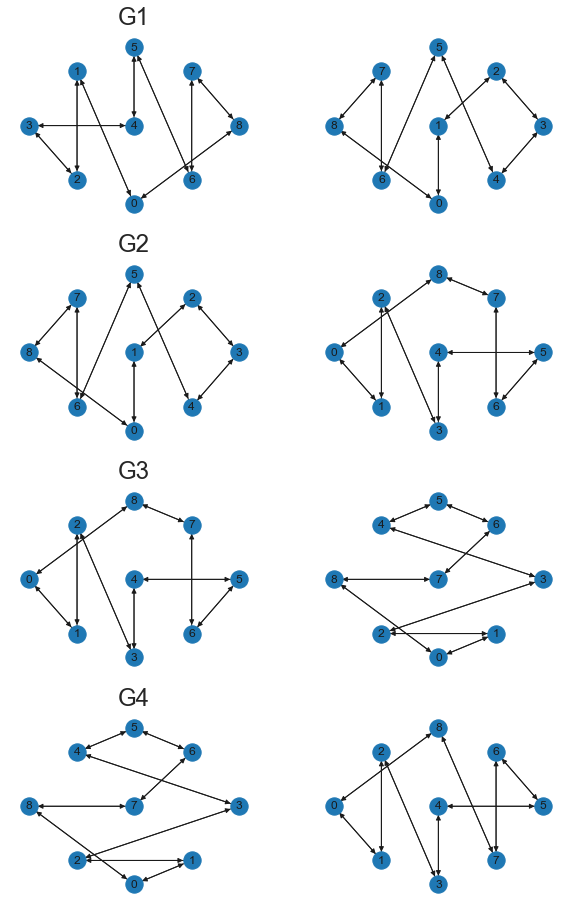

In [47]:
fav_layouts = [158,565,734,1037,740]

plt.figure(figsize=(10,16))
#################################################################################################################

plt.subplot(4,2,1)
plt.title("G1")
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[0]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,2)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[1]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

#################################################################################################################

plt.subplot(4,2,3)
plt.title("G2")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[1]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,4)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[2]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


#################################################################################################################

plt.subplot(4,2,5)
plt.title("G3")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[2]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,6)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(rotate(flip(layouts[fav_layouts[3]],'H')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

#################################################################################################################
plt.subplot(4,2,7)
plt.title("G4")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(rotate(flip(layouts[fav_layouts[3]],'H')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,8)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(((layouts[fav_layouts[4]])))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)
plt.savefig("/Users/Yves/Documents/G1-4_loop.svg")


[0,2,4,3,6,8,7,1,5]

[8,1,6,3,4,0,7,2,5],[8,4,2,5,7,0,6,1,3],[3,6,1,8,4,5,7,2,0],[0,2,4,3,6,8,7,1,5],[4,7,5,1,3,6,0,2,8,4],[1,8,2,3,6,0,4,5,7],[6,8,1,3,7,0,4,5,2],[7,5,2,3,6,8,1,0,5]
#[8,1,6,3,4,0,7,2,5],[3,6,1,8,4,5,7,2,0],
#[3,6,1,8,4,5,7,2,0],[8,7,6,5,1,0,2,4,3]


In [2]:
list(reverse([8,4,2,5,7,0,6,1,3]))

[3, 1, 6, 0, 7, 5, 2, 4, 8]

# Draw line graphs 

In [48]:
fav_layouts = [158,565,734,1037,740]


edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])
#edges.extend([[0,8],[8,0]])

G = nx.DiGraph()
G.add_edges_from(edges)

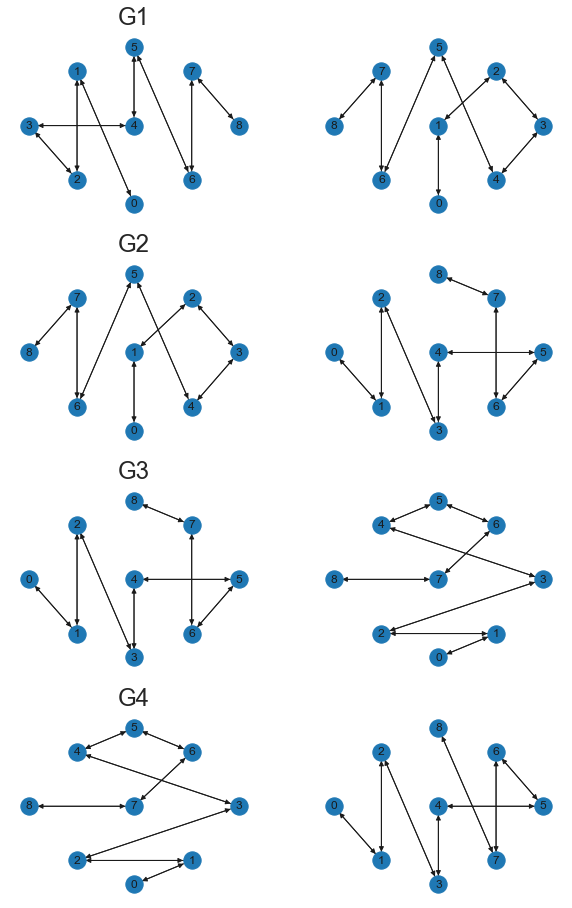

In [49]:
fav_layouts = [158,565,734,1037,740]

plt.figure(figsize=(10,16))
#################################################################################################################

plt.subplot(4,2,1)
plt.title("G1")
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[0]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,2)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[1]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

#################################################################################################################

plt.subplot(4,2,3)
plt.title("G2")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[1]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,4)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[2]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


#################################################################################################################

plt.subplot(4,2,5)
plt.title("G3")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(layouts[fav_layouts[2]])],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,6)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(rotate(flip(layouts[fav_layouts[3]],'H')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

#################################################################################################################
plt.subplot(4,2,7)
plt.title("G4")

nx.draw(G,
    pos=np.array(poke_pos)[np.array(rotate(flip(layouts[fav_layouts[3]],'H')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(4,2,8)
nx.draw(G,
    pos=np.array(poke_pos)[np.array(((layouts[fav_layouts[4]])))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)
plt.savefig("/Users/Yves/Documents/G1-4_line.svg")